# Importing the Libraries

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

Using TensorFlow backend.


In [2]:
#Intialize the model
model=Sequential()

In [3]:
# Add Convolution Layer
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))

In [4]:
#Add Pooling Layer
model.add(MaxPooling2D(pool_size = (2, 2)))

In [5]:
#Add Flattening Layer
model.add(Flatten())

In [6]:
#Add Hidden Layer
model.add(Dense(init="random_uniform",activation="relu",output_dim=120))

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=120, kernel_initializer="random_uniform")`
  


In [7]:
#Add Output layer
model.add(Dense(init="random_uniform",activation="sigmoid",output_dim=1))

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="random_uniform")`
  


In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
x_train = train_datagen.flow_from_directory('C:/Users/Admin/OneDrive/Desktop/Dataset/TrainData',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                     class_mode = 'binary')
x_test = test_datagen.flow_from_directory('C:/Users/Admin/OneDrive/Desktop/Dataset/TestData',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 77 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [10]:
print(x_train.class_indices)

{'Psoriasis': 0, 'SkinCancer': 1}


In [11]:
#Compile the model
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
#Compile the model
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [13]:
model.fit_generator(x_test,
                         steps_per_epoch = 200,
                         epochs = 10,
                         validation_data = x_test,
                         validation_steps = 63)


Epoch 1/10
200/200 [==============================] - 65s 323ms/step - loss: 0.0028 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/10
200/200 [==============================] - 63s 314ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 3/10
200/200 [==============================] - 65s 325ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 4/10
200/200 [==============================] - 66s 332ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5/10
200/200 [==============================] - 67s 333ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6/10
200/200 [==============================] - 67s 337ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7/10
200/200 [==============================] - 70s 351ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Ep

In [14]:
model.save("cnnmodel.h5")

In [15]:
!pip install opencv-contrib-python

In [16]:
from keras.models import load_model
import numpy as np
import cv2
model=load_model('cnnmodel.h5')

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [18]:
from skimage.transform import resize

def detect(frame):
    try:
        img = resize(frame,(64,64))
        img = np.expand_dims(img,axis=0)
        if(np.max(img)>1):
            img = img/255.0
        prediction = model.predict(img)
        print(prediction)
        prediction = model.predict_classes(img)
        print(prediction)
    except AttributeError:
        print("shape not found")


In [19]:
frame=cv2.imread("C:/Users/Admin/OneDrive/Desktop/Dataset/TrainData/Psoriasis/download.jfif")
data = detect(frame)

[[1.]]
[[1]]


In [20]:
from matplotlib.pyplot import *

[[1.]]
[[1]]


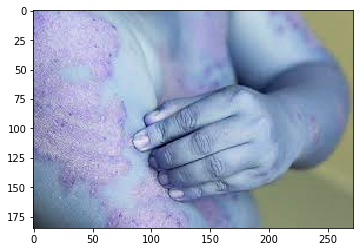

In [21]:
frame=cv2.imread(r'C:/Users/Admin/OneDrive/Desktop/Dataset/TrainData/Psoriasis/download.jfif')
imshow(frame)
data=detect(frame)